In [2]:
import pandas as pd
import numpy as np
import seaborn as sn

In [3]:
data= pd.read_csv("G:/Datoskevinla/Downloads/data - data.csv")

In [4]:
data.head()

,Unnamed: 0,ID,UPDATE,STATUS,MOTIVE,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
0,0,1,59:50.4,RESPONSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,46:41.4,RISK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,14:50.5,APPROVED,DIGITAL,40.0,1300.0,49.0,NaN,NaN,NaN
3,3,1,08:23.4,NaN,NaN,NaN,NaN,NaN,434.112066,NaN,NaN
4,4,2,00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
data["INTEREST_RATE"].astype(int)
data.head()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [66]:
data.to_csv("Dataa.csv")

### Entendimiento de datos

In [6]:
#tipo de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12756 entries, 0 to 12755
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12756 non-null  int64  
 1   ID              12756 non-null  int64  
 2   UPDATE          12756 non-null  object 
 3   STATUS          7940 non-null   object 
 4   MOTIVE          2298 non-null   object 
 5   INTEREST_RATE   1505 non-null   float64
 6   AMOUNT          1505 non-null   float64
 7   CAT             1505 non-null   float64
 8   TXN             3773 non-null   float64
 9   CP              1046 non-null   float64
 10  DELIVERY_SCORE  1046 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 1.1+ MB


In [10]:
data.describe(include= "all")

,Unnamed: 0,ID,UPDATE,STATUS,MOTIVE,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
count,12756.000000,12756.000000,12756,7940,2298,1505.000000,1505.000000,1505.000000,3773.000000,1046.000000,1046.000000
unique,NaN,NaN,9992,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,00:00.0,RESPONSE,PLASTIC,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1043,2298,1046,NaN,NaN,NaN,NaN,NaN,NaN
mean,6377.500000,2516.923330,NaN,NaN,NaN,39.695681,14479.800664,39.663787,2009.774234,42298.432122,1.964627
std,3682.484352,1465.606943,NaN,NaN,NaN,5.924762,14520.262941,5.751843,10034.936766,16757.547428,1.116938
min,0.000000,1.000000,NaN,NaN,NaN,30.000000,0.000000,30.000000,0.342075,11560.000000,0.000000
25%,3188.750000,1204.000000,NaN,NaN,NaN,35.000000,3800.000000,35.000000,67.888982,44100.000000,1.000000
50%,6377.500000,2571.000000,NaN,NaN,NaN,40.000000,9800.000000,40.000000,265.086727,44620.000000,2.000000
75%,9566.250000,3801.000000,NaN,NaN,NaN,45.000000,20100.000000,45.000000,1061.080947,53100.000000,3.000000


In [30]:
# Cambiar formato a fecha para Update
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date



# Agrupación por grupo de datos 
segm_prop = data[["STATUS","ID"]].groupby(["STATUS"]).count() / data.shape[0]
segm_prop

,ID
STATUS,
APPROVED,0.117984
DELIVERED,0.082001
REJECTED,0.062167
RESPONSE,0.180151
RISK,0.180151


C:\Users\kevinla\AppData\Local\Temp/ipykernel_21244/400953620.py:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(segm_prop['ID'],


Text(0.5, 1.0, 'Segment Proportions')

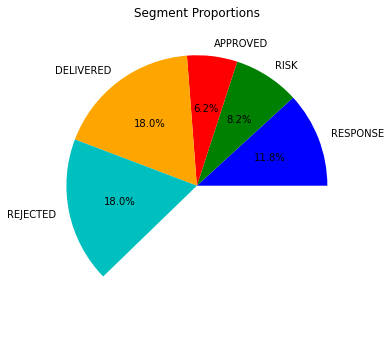

In [31]:
# We plot the segment proportions as a pie chart. 
# We can easily see which is the largest segment and the relative sizes of each segment.
plt.figure(figsize = (9, 6))
plt.pie(segm_prop['ID'],
        labels=["RESPONSE","RISK","APPROVED","DELIVERED","REJECTED"],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'r', 'orange',"c","b"))
plt.title('Segment Proportions')

In [35]:
# Agrupación por grupo de datos - Personas a las que se les entregó la tarjeta 

segm_= data[["INTEREST_RATE","AMOUNT","CAT","ID"]].groupby(["ID"]).sum()

#Se dejan solamente los clientes que adquirieron la tarjeta y se dejan las variables de 
#Interes AMOUNT = El monto del crédito aprobado para el cliente.
#CAT = El costo anual del crédito otorgado al cliente. 

segm_= segm_[(segm_["INTEREST_RATE"] > 0)]
segm_

,INTEREST_RATE,AMOUNT,CAT
ID,,,
1,40.0,1300.0,49.0
4,32.0,10000.0,39.0
5,46.0,15900.0,48.0
8,40.0,3300.0,42.0
11,32.0,49800.0,32.0
...,...,...,...
4966,48.0,2600.0,48.0
4970,42.0,16100.0,44.0
4991,35.0,4300.0,33.0


In [57]:

#Estadisticas descriptivas para los clientes que realizaron el proceso. 
segm_.describe()

,INTEREST_RATE,AMOUNT,CAT
count,1505.000000,1505.000000,1505.000000
mean,39.695681,14479.800664,39.663787
std,5.924762,14520.262941,5.751843
min,30.000000,0.000000,30.000000
25%,35.000000,3800.000000,35.000000
50%,40.000000,9800.000000,40.000000
75%,45.000000,20100.000000,45.000000
max,49.000000,108300.000000,49.000000


In [51]:
print ("El número de personas que se les acepto Tarjeta de credito fue de :" + str((len(segm_)/len(data)*100)) +" Porciento")

El número de personas que se les acepto Tarjeta de credito fue de :11.798369394794607 Porciento


Text(0, 0.5, 'Amount')

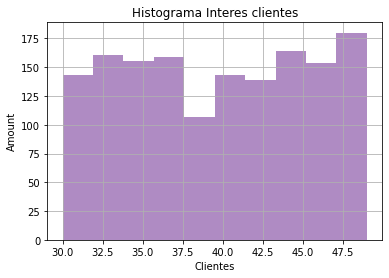

In [56]:
#Distribución 

segm_["INTEREST_RATE"].plot.hist(grid=True, bins=10 ,color= "#af8bc3")
plt.title("Histograma Interes clientes")
plt.xlabel("Clientes")
plt.ylabel("Amount")

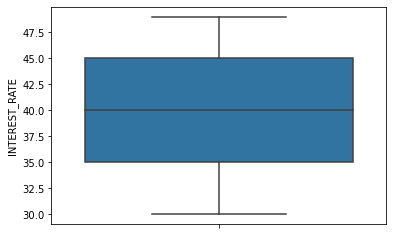

In [58]:
sns.boxplot(y=segm_["INTEREST_RATE"])
plt.show()

Text(0, 0.5, 'Clientes')

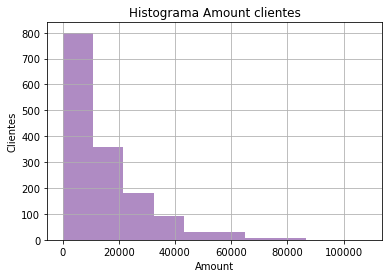

In [55]:
segm_["AMOUNT"].plot.hist(grid=True, bins=10 ,color= "#af8bc3")
plt.title("Histograma Amount clientes")
plt.xlabel("Amount")
plt.ylabel("Clientes")

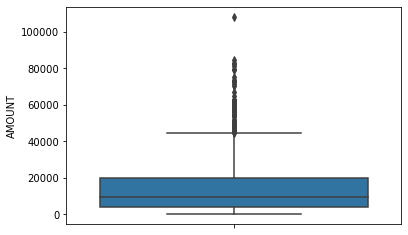

In [59]:
sns.boxplot(y=segm_["AMOUNT"])
plt.show()

Text(0, 0.5, 'CAT')

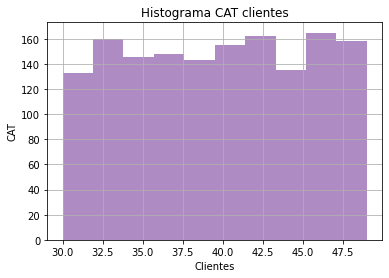

In [60]:
#Distribución 

segm_["CAT"].plot.hist(grid=True, bins=10 ,color= "#af8bc3")
plt.title("Histograma CAT clientes")
plt.xlabel("Clientes")
plt.ylabel("CAT")

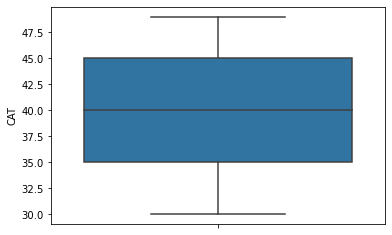

In [61]:
sns.boxplot(y=segm_["CAT"])
plt.show()

In [63]:
# Agrupación por grupo de datos - Personas CP - ENTREGAS Y CALIFICACIÓN

segm_1= data[["CP","DELIVERY_SCORE","ID"]].groupby(["ID"]).sum()

#Se dejan solamente los clientes que adquirieron la tarjeta y se dejan las variables de 
#CP = Código ZIP donde la tarjeta de crédito física fue entregada. 
#DELIVERY_SCORE = Una puntuación que el cliente otorga a la compañía de servicio de entrega por el servicio brindado. 


segm_1= segm_1[(segm_1["CP"] > 0)]
segm_1

,CP,DELIVERY_SCORE
ID,,
4,11560.0,3.0
5,53100.0,0.0
8,11560.0,2.0
11,64000.0,0.0
14,11560.0,4.0
...,...,...
4957,11560.0,1.0
4962,11560.0,1.0
4966,44100.0,3.0


Text(0, 0.5, 'DELIVERY_SCORE')

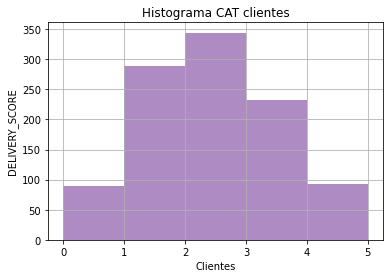

In [65]:
#Distribución 

segm_1["DELIVERY_SCORE"].plot.hist(grid=True, bins=5 ,color= "#af8bc3")
plt.title("Histograma CAT clientes")
plt.xlabel("Clientes")
plt.ylabel("DELIVERY_SCORE")